Pre-Requisites:

- pystan
- prophet

In [ ]:
pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [ ]:
# Mounting the google colab drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TSA/AirPassengers.csv')
df.head(5)
df = df.rename(columns={'#Passengers': 'y', 'Month':'ds'})

In [ ]:
df.tail(5)

ds    y
139  1960-08  606
140  1960-09  508
141  1960-10  461
142  1960-11  390
143  1960-12  432

In [ ]:
df['y_orig'] = df['y']
print(df.head(5))

        ds    y  y_orig
0  1949-01  112     112
1  1949-02  118     118
2  1949-03  132     132
3  1949-04  129     129
4  1949-05  121     121


In [ ]:
# to save a copy of the original data..you'll see why shortly.
df['y'] = np.log(df['y'])

In [ ]:
df.head(5)

ds         y  y_orig
0  1949-01  4.718499     112
1  1949-02  4.770685     118
2  1949-03  4.882802     132
3  1949-04  4.859812     129
4  1949-05  4.795791     121

In [ ]:
model = Prophet() #instantiate Prophet
model.add_country_holidays(country_name='US')
model.fit(df)

#train_test_split: df: train/test, then run the code for train, compare the prediction vs test

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7t_rof9z/boxvlz93.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7t_rof9z/pgt3b63z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73611', 'data', 'file=/tmp/tmp7t_rof9z/boxvlz93.json', 'init=/tmp/tmp7t_rof9z/pgt3b63z.json', 'output', 'file=/tmp/tmp7t_rof9z/prophet_modelyt72i8uh/prophet_model-20230731101233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:12:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:12:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
'''     'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''
#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model.make_future_dataframe(periods=12, freq = 'M')

In [ ]:
forecast_data = model.predict(future_data)

In [ ]:
forecast_data.tail(5)

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
151 1961-07-31  6.272798    6.435495    6.535426     6.260684     6.285773   
152 1961-08-31  6.281822    6.312922    6.412920     6.267527     6.297669   
153 1961-09-30  6.290555    6.156028    6.258343     6.273826     6.309685   
154 1961-10-31  6.299579    6.022035    6.121958     6.279797     6.322049   
155 1961-11-30  6.308312    6.159782    6.266383     6.285032     6.334291   

     Armistice Day  Armistice Day_lower  Armistice Day_upper  \
151            0.0                  0.0                  0.0   
152            0.0                  0.0                  0.0   
153            0.0                  0.0                  0.0   
154            0.0                  0.0                  0.0   
155            0.0                  0.0                  0.0   

     Armistice Day (Observed)  ...  holidays  holidays_lower  holidays_upper  \
151                       0.0  ...       0.0             0.0             0.0   
152                       0.0  ...       0.0             0.0             0.0   
153                       0.0  ...       0.0             0.0             0.0   
154                       0.0  ...       0.0             0.0             0.0   
155                       0.0  ...       0.0             0.0             0.0   

       yearly  yearly_lower  yearly_upper  multiplicative_terms  \
151  0.211242      0.211242      0.211242                   0.0   
152  0.079473      0.079473      0.079473                   0.0   
153 -0.085199     -0.085199     -0.085199                   0.0   
154 -0.228849     -0.228849     -0.228849                   0.0   
155 -0.096687     -0.096687     -0.096687                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper      yhat  
151                         0.0                         0.0  6.484039  
152                         0.0                         0.0  6.361295  
153                         0.0                         0.0  6.205355  
154                         0.0                         0.0  6.070730  
155                         0.0                         0.0  6.211625  

[5 rows x 64 columns]

In [ ]:

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

ds      yhat  yhat_lower  yhat_upper
151 1961-07-31  6.484039    6.435495    6.535426
152 1961-08-31  6.361295    6.312922    6.412920
153 1961-09-30  6.205355    6.156028    6.258343
154 1961-10-31  6.070730    6.022035    6.121958
155 1961-11-30  6.211625    6.159782    6.266383

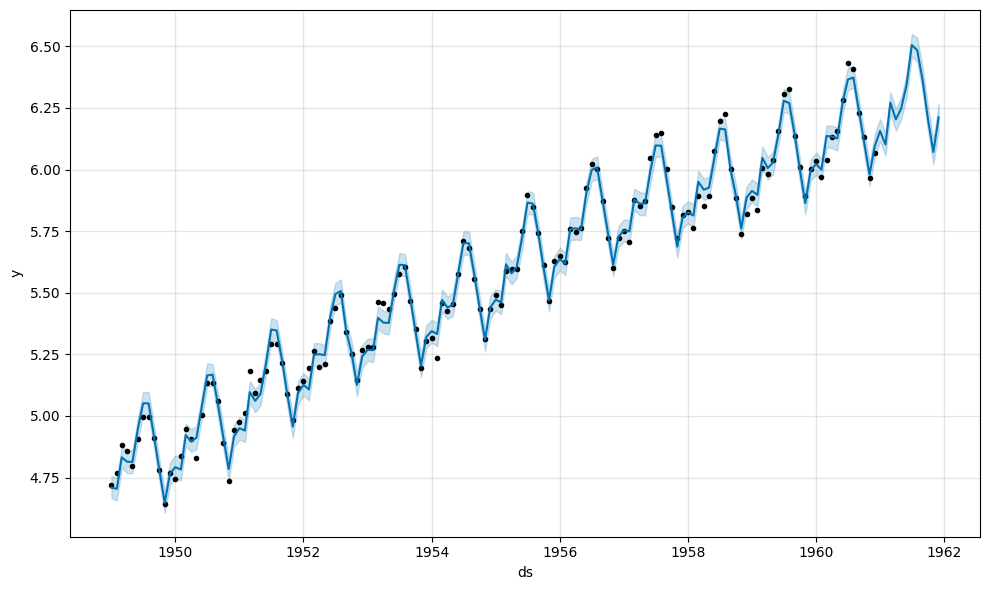

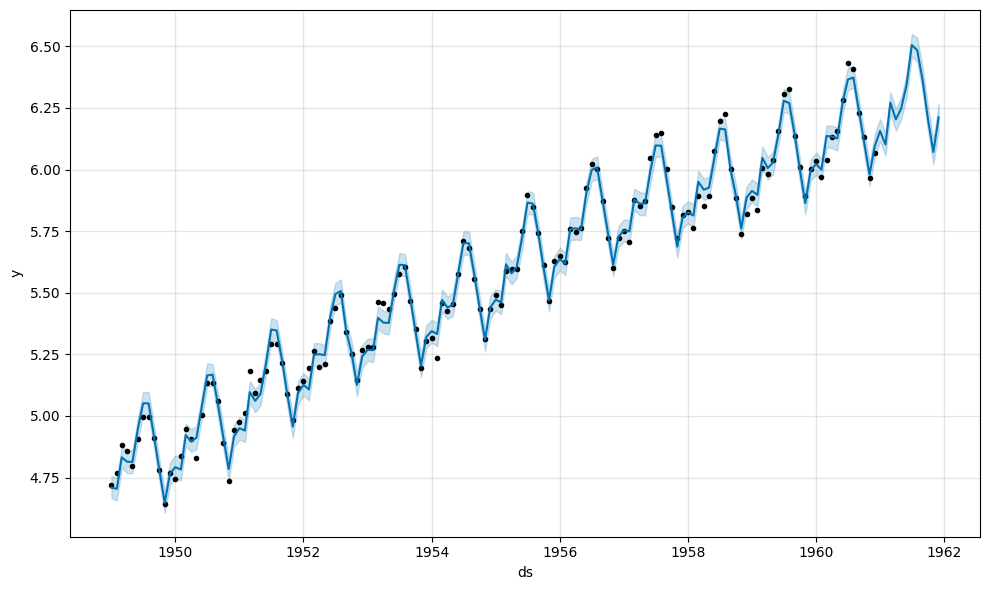

In [ ]:
model.plot(forecast_data)

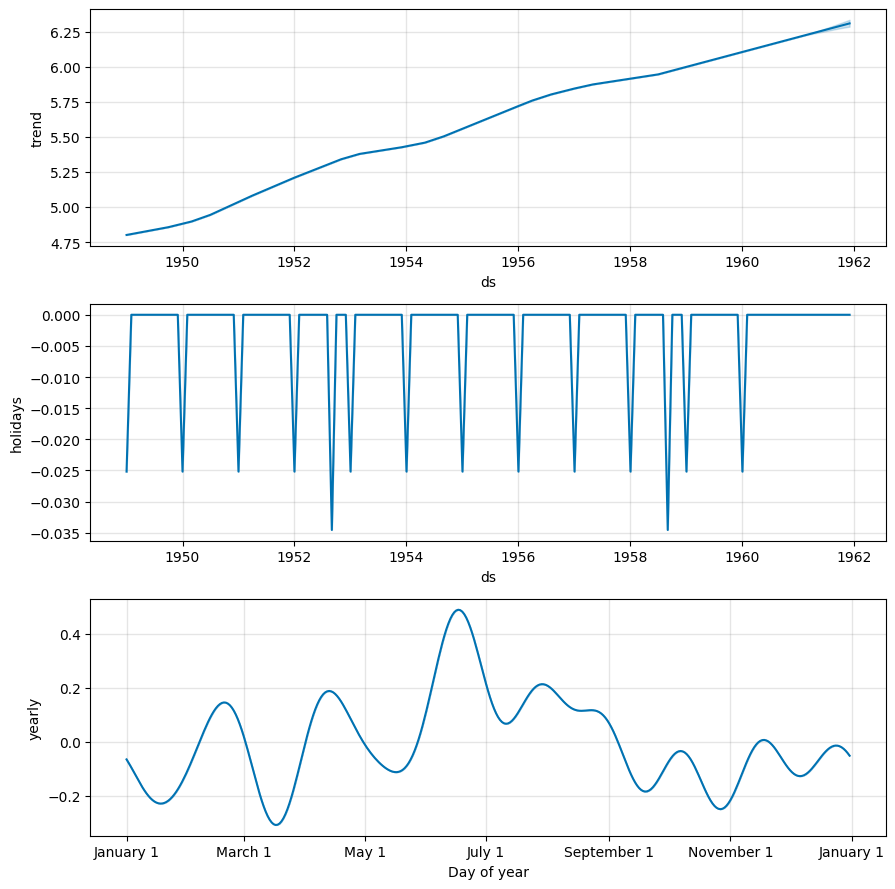

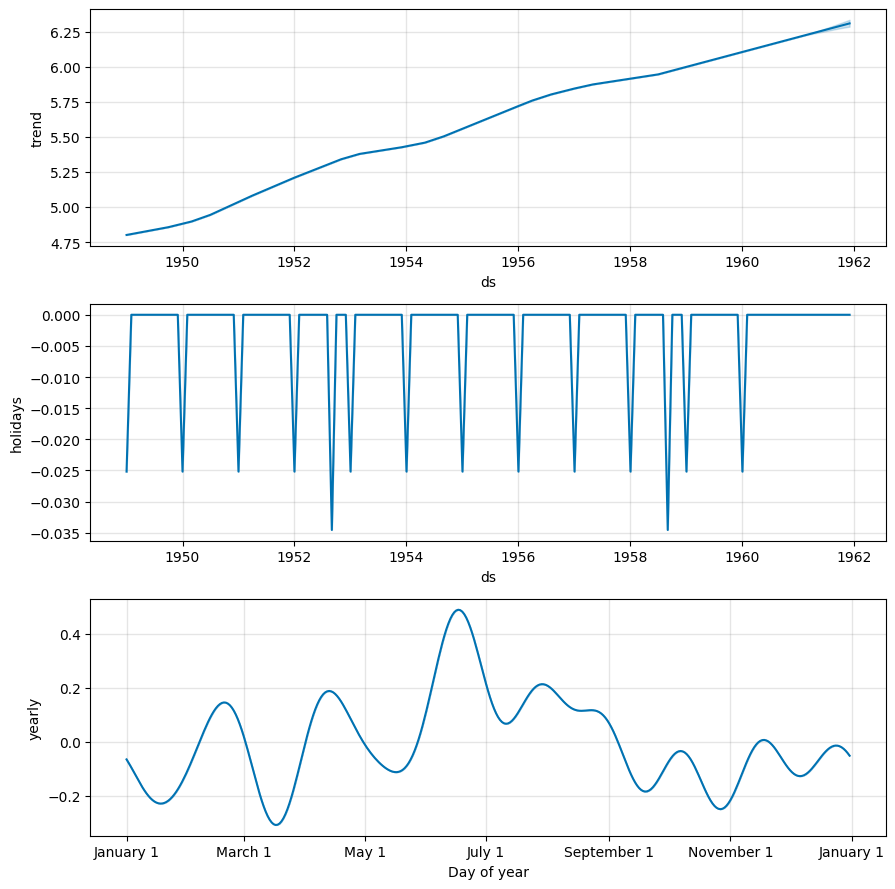

In [ ]:
model.plot_components(forecast_data)

In [ ]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

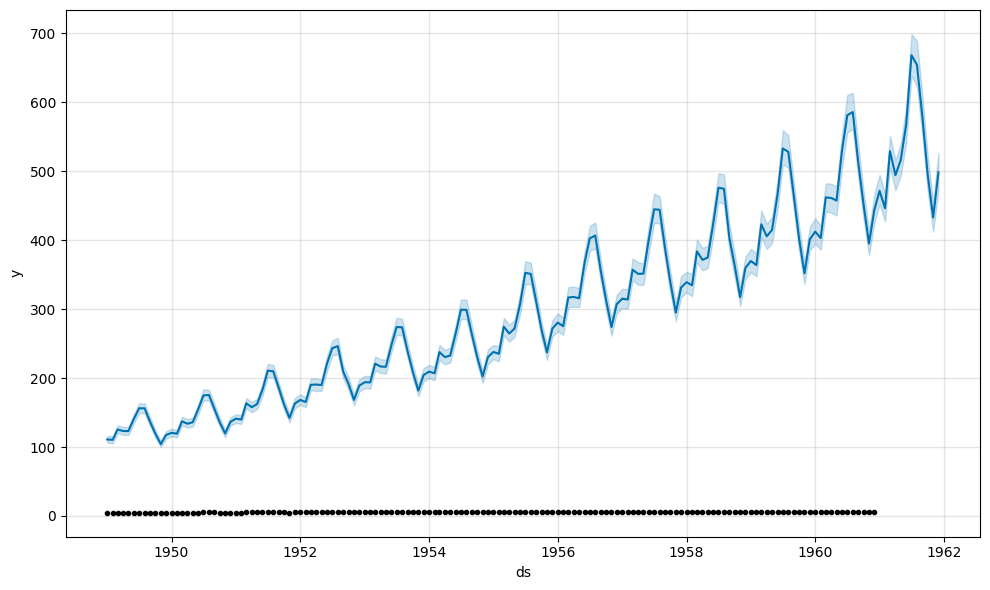

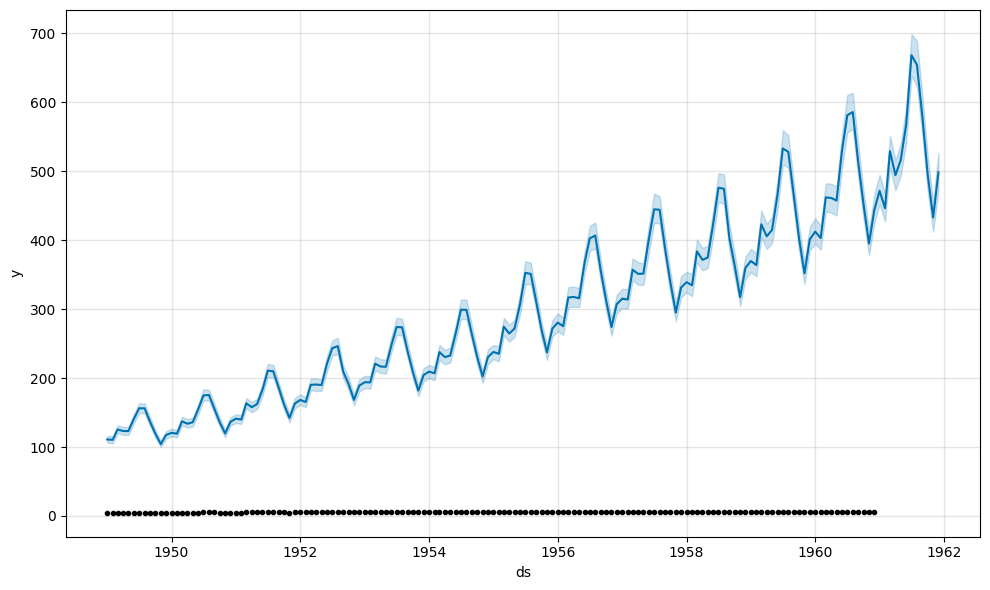

In [ ]:
model.plot(forecast_data_orig)

In [ ]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']

In [ ]:
final_df = pd.DataFrame(forecast_data_orig)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'

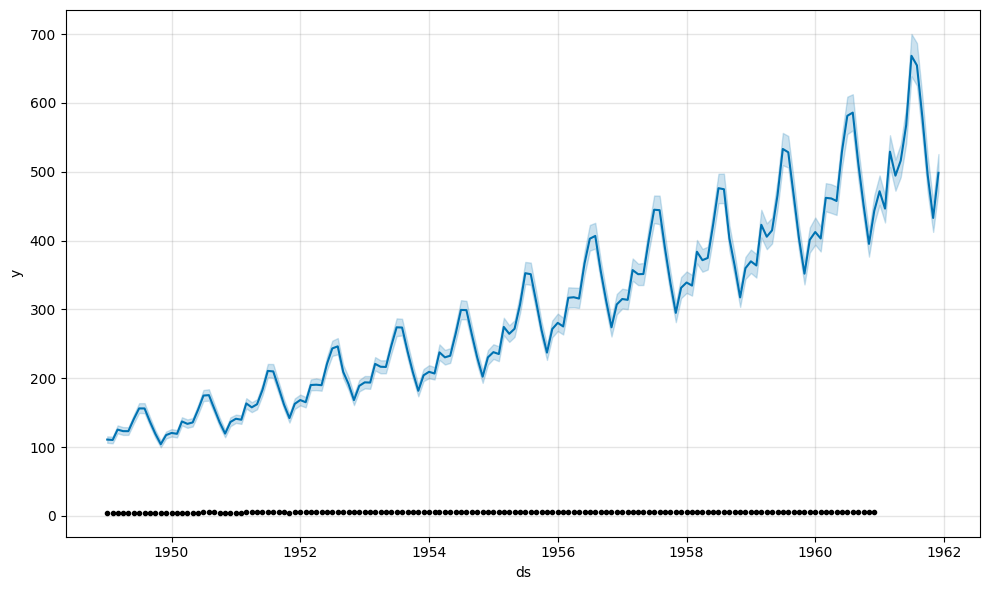

In [ ]:
fig = model.plot(forecast_data)
fig.savefig('forecast.png')